In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import Image, display,HTML
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By

In [2]:
# url = "https://www.naukri.com/"
# response = requests.get(url).text
# soup = BeautifulSoup(response, "html.parser")
# soup

In [3]:
driver = webdriver.Firefox()

In [4]:
driver.get("https://www.naukri.com/")

In [5]:
ele = driver.find_elements(By.CLASS_NAME,'suggestor-wrapper')

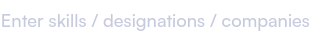

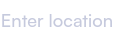

In [6]:
for x in ele:
    display(Image(x.screenshot_as_png))

In [7]:
skills_input_element = ele[0].find_element(By.TAG_NAME,'input')

In [8]:
location_input_element = ele[1].find_element(By.TAG_NAME,'input')

In [9]:
skills_input_element.send_keys("Data Analyst")
skills_input_element.send_keys(Keys.RETURN)
location_input_element.send_keys('Bangalore')
location_input_element.send_keys(Keys.RETURN)

In [10]:
driver.current_url
from time import sleep
sleep(10)

In [11]:
job_cards_elements = driver.find_elements(By.CLASS_NAME,'jobTuple')

In [12]:
data = []
for job_card_element in job_cards_elements:
    job_card_header_element  = job_card_element.find_element(By.CLASS_NAME,'jobTupleHeader')
    # header info
    job_title = job_card_header_element.find_element(By.CLASS_NAME,'title').text
    company_name = job_card_header_element.find_element(By.CLASS_NAME,'subTitle').text
    star_rating_elements = job_card_header_element.find_elements(By.CLASS_NAME,'starRating')
    star_rating = star_rating_elements[0].text if len(star_rating_elements)>0 else 0
    reviews_count_elements = job_card_header_element.find_elements(By.CLASS_NAME,'reviewsCount')
    reviews_count = star_rating_elements[0].text if len(star_rating_elements)>0 else 0
    # body
    job_description = job_card_element.find_element(By.CLASS_NAME,'job-description').text
    tags_element = job_card_element.find_element(By.CLASS_NAME,'tags')
    tags_list = list(map(lambda x : x.text,tags_element.find_elements(By.TAG_NAME,'li')))
    #footer
    post_date = job_card_element.find_element(By.CLASS_NAME,'jobTupleFooter').find_element(By.CLASS_NAME,'postedDate').text
    data.append({
        "job_title":job_title,
        "company_name":company_name,
        "company_star_rating":star_rating,
        "company_reviews_count":reviews_count,
        "tags_list":tags_list,
        "job_post_date":post_date
    })
    


In [13]:
df = pd.DataFrame.from_dict(data)

In [14]:
print(df[:1])

           job_title company_name company_star_rating company_reviews_count  \
0  Tech Data Analyst        Wipro                 3.9                   3.9   

                                           tags_list job_post_date  
0  [Tableau, Data Analytics, Python, sql, Technic...    7 Days Ago  


In [15]:
display(HTML(df.to_html()))

,job_title,company_name,company_star_rating,company_reviews_count,tags_list,job_post_date
0,Tech Data Analyst,Wipro,3.9,3.9,"[Tableau, Data Analytics, Python, sql, Technical analysis, Data Transformation, Data analysis, Bi]",7 Days Ago
1,Data Analyst,Tata Consultancy Services (TCS),3.9,3.9,"[Analysis, Data, Data analysis]",1 Day Ago
2,Data Analyst,Artech,0,0,"[Oracle plsql, R, data analysis, unix shell scripting, R Shiny, Unix, PLSQL, JIRA]",1 Day Ago
3,Insight Data Analyst,Vuca Consulting,0,0,"[Business Analytics, Power Bi, Tableau, Data Visualization, Data Analytics, Metrics analysis, Python, Development]",1 Day Ago
4,Data Analyst,KPI Partners,4.1,4.1,"[Analysis, Excel, Analytical, Data analysis, Data, SQL, Analytics, Analytical Skill]",1 Day Ago
5,Data Analyst,Vsmart World Communication,0,0,"[Data analysis, Data, Data Analyst]",1 Day Ago
6,Data Analyst,Brunel,4.4,4.4,"[Analysis, Excel, VLOOKUP, Data analysis, Data, Business analysis, Data quality, Powerpoint]",2 Days Ago
7,Celonis & Salesforce Data Analyst,Hitachi Energy,4.0,4.0,"[Improvement, Intelligence, Data analysis, Data, Business intelligence, SQL, Process, CRM]",2 Days Ago
8,Celonis & Salesforce Data Analyst,Hitachi Ltd.,4.1,4.1,"[Salesforce, Improvement, Analysis, Analytical, Data modeling, Data analysis, Process improvement, Data]",3 Days Ago
9,Data Analyst,HARMAN,3.8,3.8,"[ssms, ms sql, sql queries, SQL Coding, SQL Server, Query, Data analysis, Coding]",4 Days Ago
